In [3]:
# For plotting hw8 results
import matplotlib.pyplot as plt
import numpy as np
from copy import deepcopy
from hw8_jf import multivariate_metropolis_hastings, hw8_pdf

In [13]:
## Run MCMC simulation (~30 seconds)
# parameters
n_samples = 100_000
burnin = n_samples // 10 
alpha = 0.5    
np.random.seed(0)                                      
                                                                                
# Run MCMC                                                                     
x0 = np.array([0., 0.])                                                           
samples, acceptance_probabilities = multivariate_metropolis_hastings(          
    x0,                                                                        
    n_samples + burnin,                                                        
    target_pdf=hw8_pdf,                                                        
    alpha=alpha)         

x_mcmc = samples[burnin:, 0]                                                           
y_mcmc = samples[burnin:, 1]

Multivariate Metropolis-Hastings: 100%|██████████| 110000/110000 [00:28<00:00, 3801.31it/s]


Text(0.5, 1.0, 'Target PDF Contour Plot')

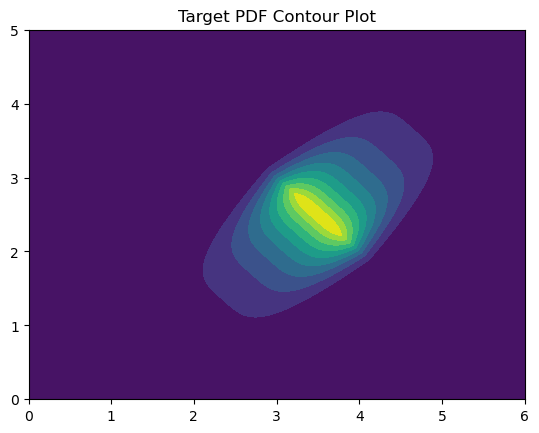

In [32]:
# init mpl objs for contours                                                          
fig, ax = plt.subplots()                                               
                                                                                
# Reproduce contour plot to target pdf                                                    
n_points = 500                                                                 
x = np.linspace(0, 6, n_points)                                                   
y = np.linspace(0, 5, n_points)                                                   
X, Y = np.meshgrid(x, y)                                                          
Z = hw8_pdf([X, Y])                                                            
ax.contourf(X, Y, Z, levels=10)
ax.set_title("Target PDF Contour Plot")

## This plot is too ugly to easily read
# ax.plot(                                                                
#     x_mcmc, y_mcmc,                               
#     marker=".", markersize=2, linewidth=0.75, color="red", alpha=0.25)       
                                                                            
# ax.set_title("Mean Acceptance Probability:"                             
#     f" {round(np.mean(acceptance_probabilities), 2)}") 

# ax.set_xlim(0, 6) 
# ax.set_ylim(0, 5)

Text(0.5, 1.0, 'Metropolis-Hastings Hexbins with Target PDF Contour Lines\nMean Acceptance Probability: 0.32')

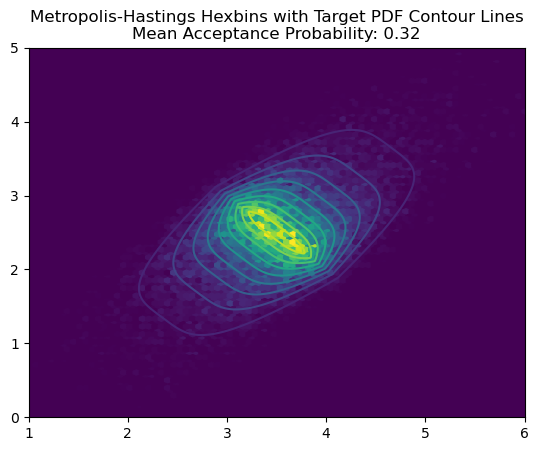

In [33]:
## MCMC path as heat map with target pdf superimposed
plt.hexbin(x_mcmc, y_mcmc, label = "MCMC Simulation")
plt.contour(X, Y, Z, levels=10)  
plt.xlim(1, 6)
plt.ylim(0, 5)
plt.title(
    "Metropolis-Hastings Hexbins with Target PDF Contour Lines"
    f"\nMean Acceptance Probability: {round(np.mean(acceptance_probabilities), 2)}")